# Segmentation Contour Plot Example

This work was supported by NIH STTR R42 CA224888

In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

from segmentation_plot import segmplot

## Create synthetic data

(4, 128, 128, 96)
[1 2 3]
(4, 128, 128, 96)
(128, 128, 96)


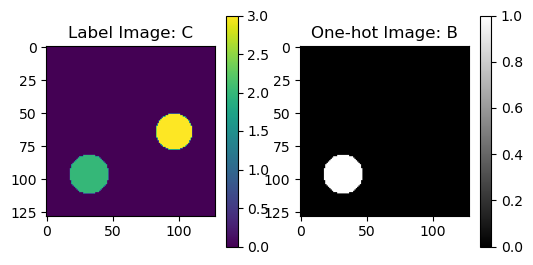

In [2]:
# Create the synthetic image example
image = np.zeros([4,128,128,96])
print(image.shape)

pts = np.array([
[1,32,32,30], # class 1
[2,96,32,42], # class 2
[3,64,96,56] # class 3
])
print(pts[:,0])
image[pts[:,0],pts[:,1],pts[:,2],pts[:,3]] = 1

radius = 16

D = np.zeros(image.shape)
for i in range(image.shape[0]):
    I = image[i,...]
    D[i,...] = ndimage.distance_transform_edt(1-I)

B = np.where(D<=radius, 1, 0)
print(B.shape)
C = np.argmax(B, axis=0)
print(C.shape)

# Create a CHWD version
D = np.expand_dims(C, axis=0)
# Create a version with noise
I = D + np.random.normal(0, 0.2, D.shape)

plt.figure('example', (6, 3))
plt.subplot(1, 2, 1)
plt.title('Label Image: C')
plt.imshow(C[:,:,48])
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('One-hot Image: B')
plt.imshow(B[2,:,:,48], cmap='gray')
plt.colorbar()
plt.show()

# Example Usage

## Basic usage

Individual colormaps can also be set by passing the [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative) name as a string

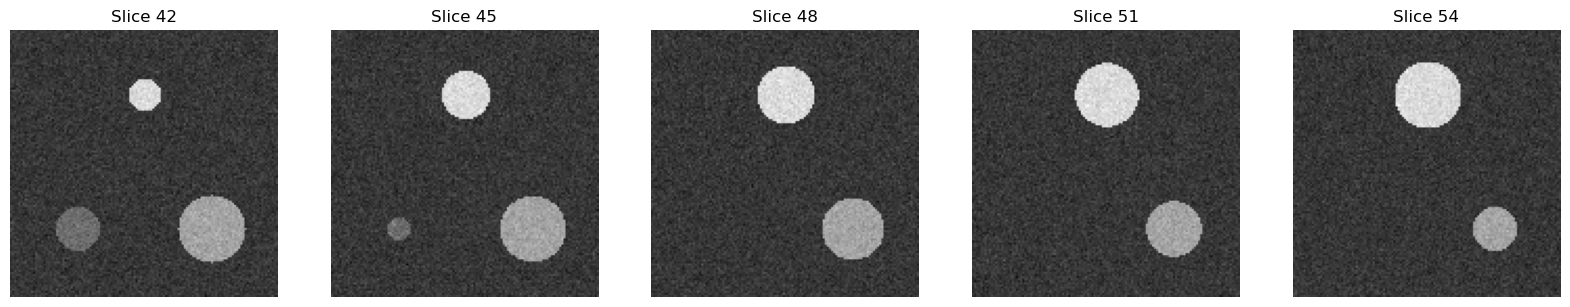

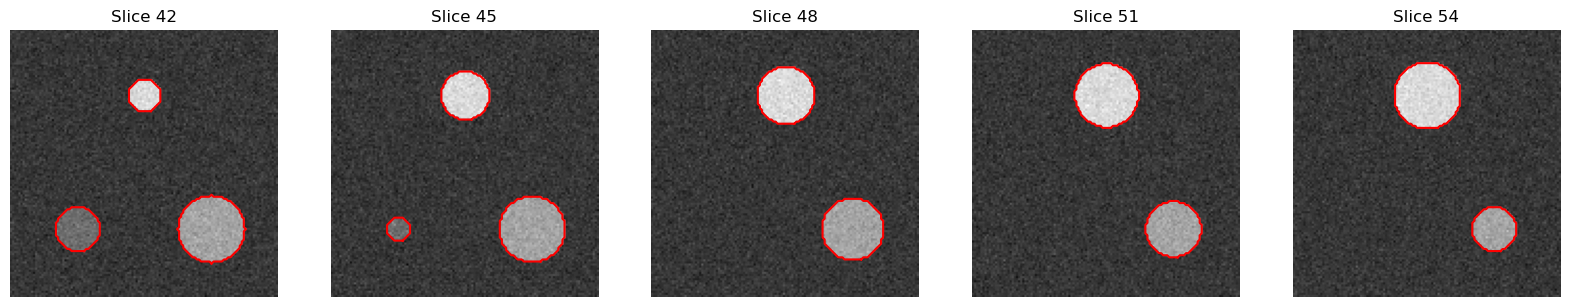

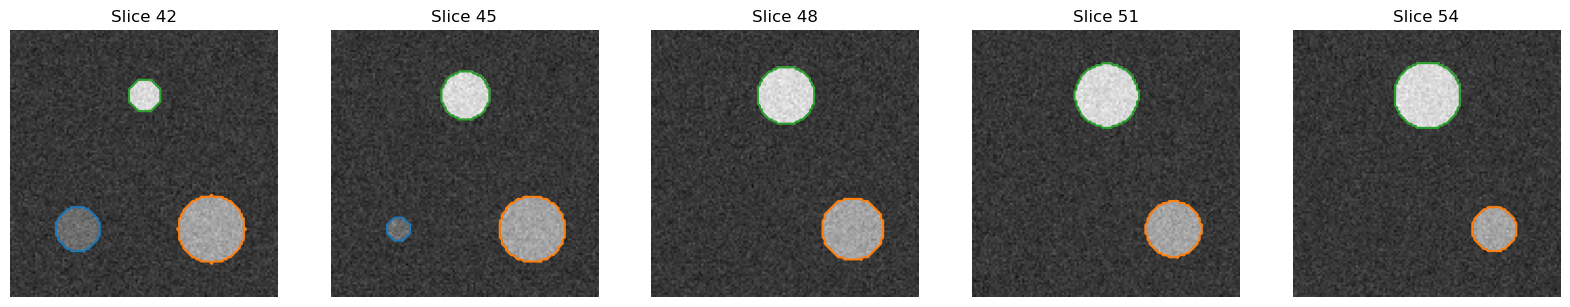

In [3]:
plot_axial = segmplot.PlotSegmentation(
    slice_axis=3, 
    num_slices=5, 
    slice_spacing=3, 
)

plt.figure('segm', (20,5))
plot_axial(I)
# fig.suptitle('No Segmentation')
plt.show()

plt.figure('segm', (20,5))
plot_axial(I, [B])
plt.show()

plt.figure('segm', (20,5))
plot_axial(I, [B], cmap_name=['tab10'])
plt.show()

## Use a bounding box to select slices

You can let the program select slices with only relevant segmentation information. You will have to pass a mask to the `bbox_image` parameter to enable this functionality.

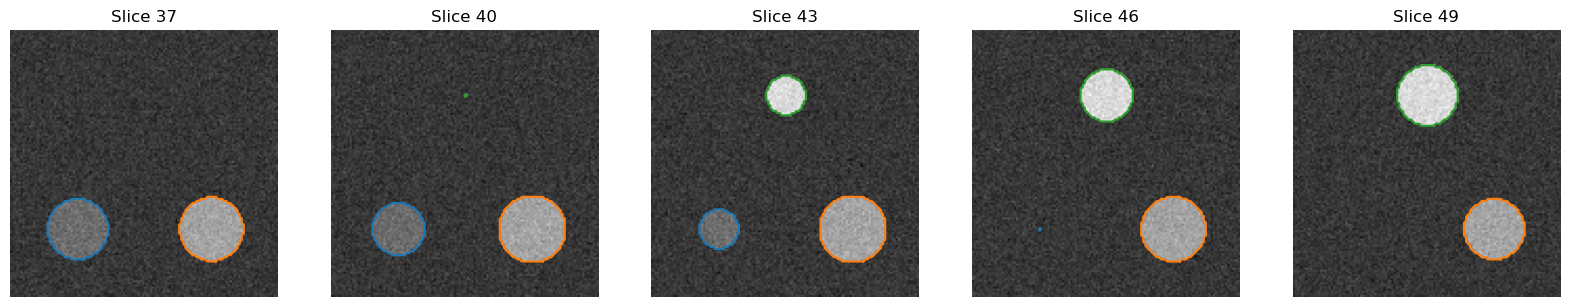

In [4]:
plot_axial = segmplot.PlotSegmentation(
    slice_axis=3, 
    num_slices=5, 
    slice_spacing=3, 
)

plt.figure('segm', (20,5))
plot_axial(I, [B], cmap_name=['tab10'], bbox_image=D)
plt.show()


## Manually setting the display slices

Instead of using centrally evenly spaced slice, you can manually define the values. These can also appear in any sequence you desire. It also performs range checking so non worries about being out of range.

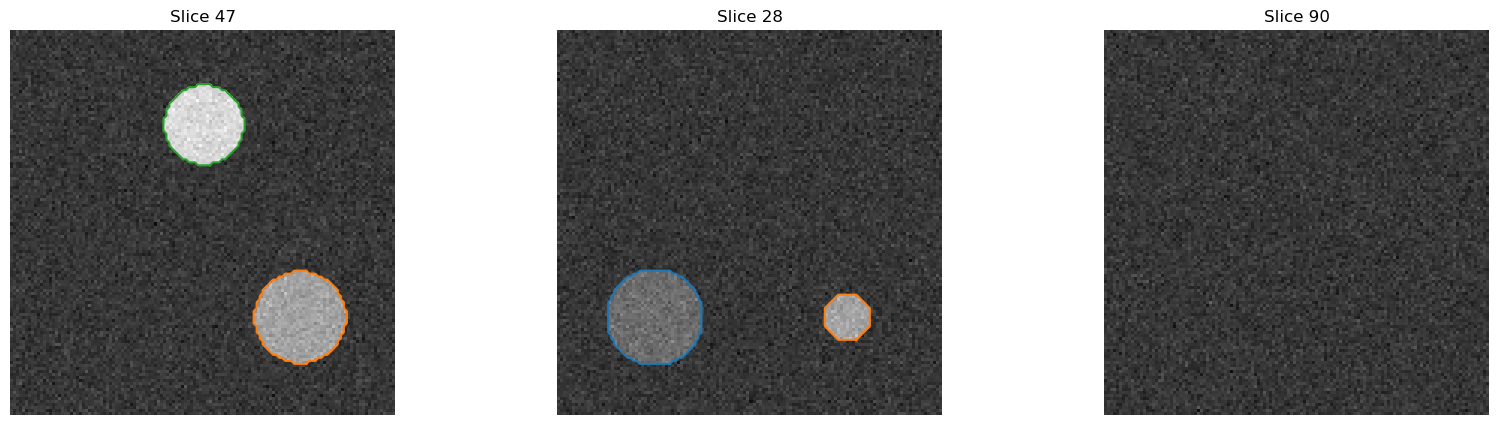

In [5]:
plot_axial = segmplot.PlotSegmentation(
    slice_indexes=[47,28,100,90],
)


plt.figure('segm', (20,5))
plot_axial(I, [B], cmap_name=['tab10'])
plt.show()

## Display two segmentations

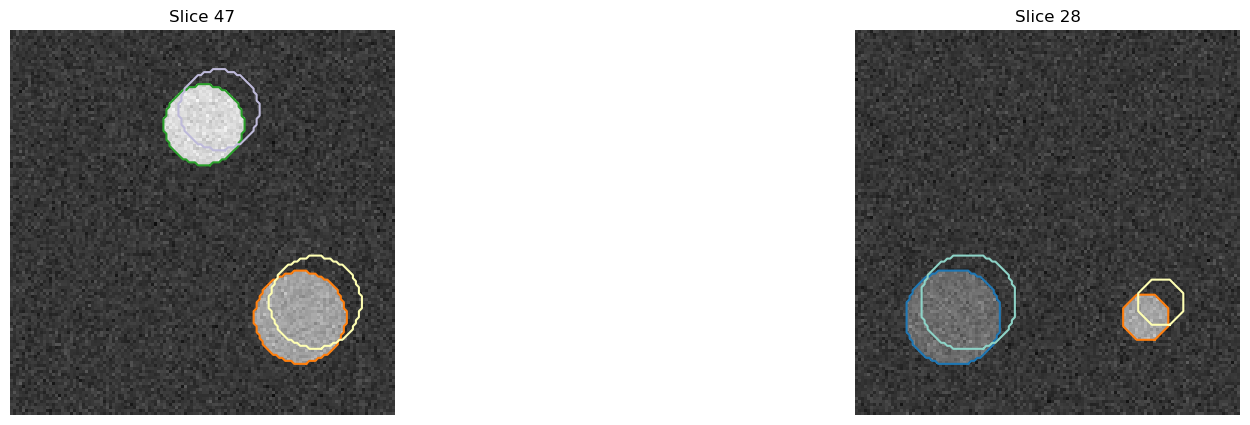

In [6]:

B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (20,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

## Change contour display properties

You can change the plotting style by passing `plt.plot` keyword/value pairs, e.g. `linewidth=2`, `alpha=0.5`, etc. See the matplotlib [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for details.

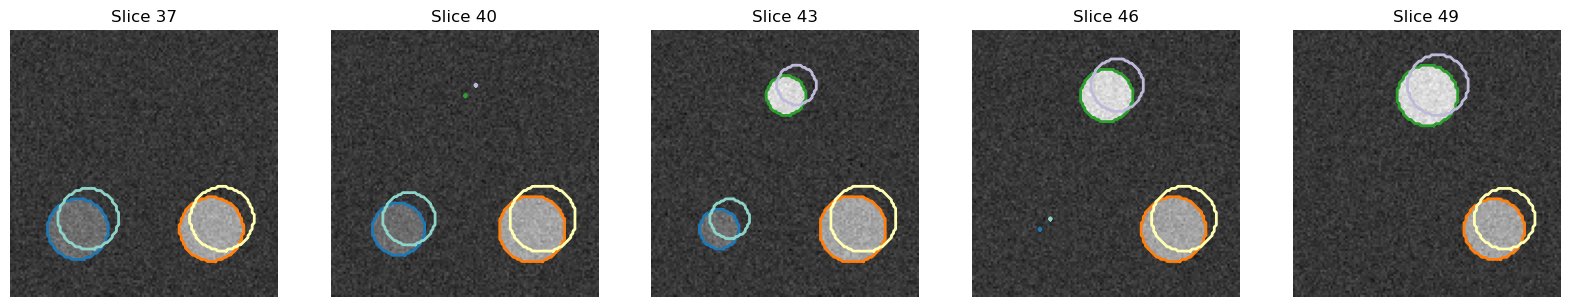

In [7]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=3, 
    slice_axis=3, 
    linewidth=2,
)

B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (20,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

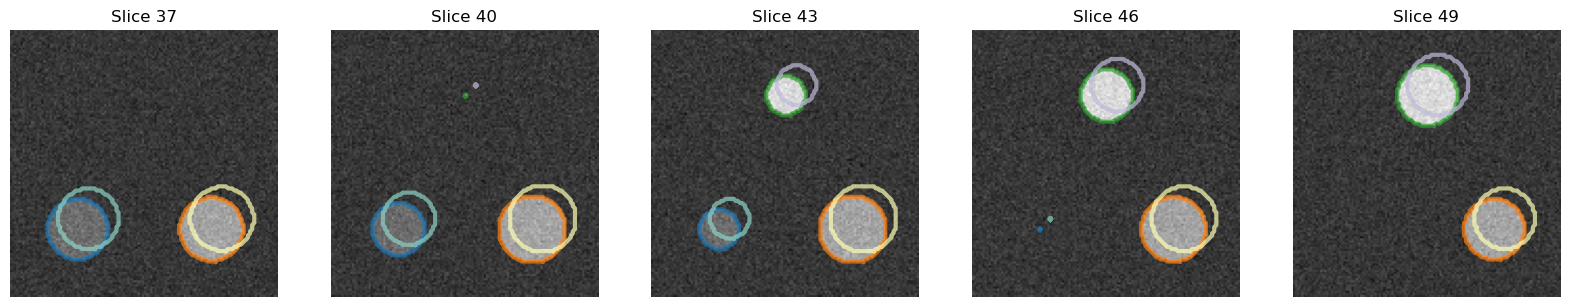

In [8]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=3, 
    slice_axis=3, 
    linewidth=3,
    alpha=0.7,
)

B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (20,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

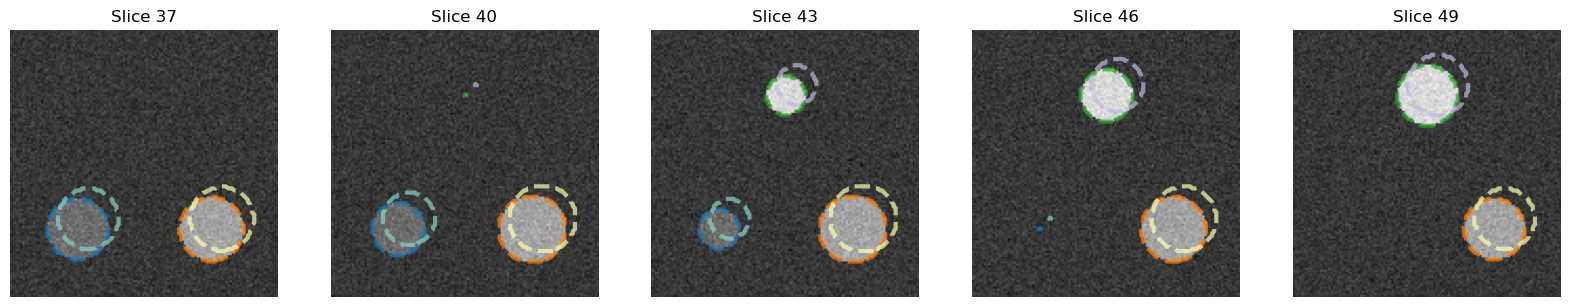

In [9]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=3, 
    slice_axis=3, 
    linewidth=3,
    alpha=0.7,
    linestyle='--'
)

B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (20,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

## Change the number of slices

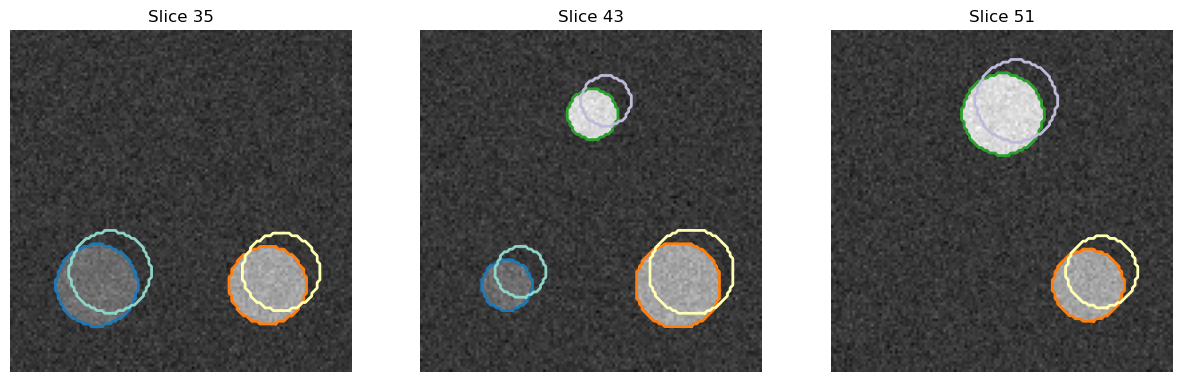

In [10]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=3, 
    slice_spacing=8, 
    slice_axis=3, 
    linewidth=2.0, 
)


B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (15,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

## Display multiple views

Create three different plotting objects to display different image axes.

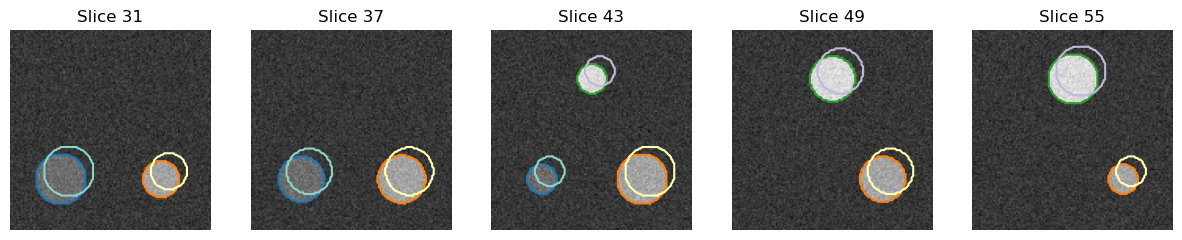

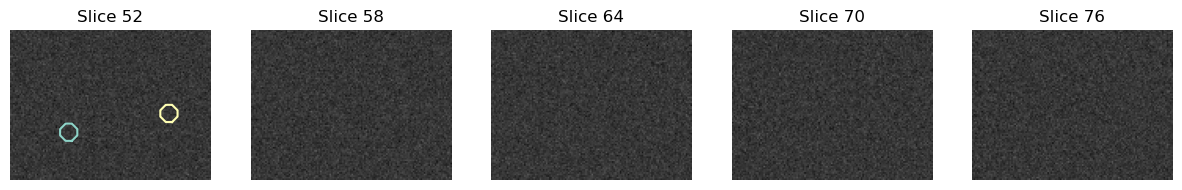

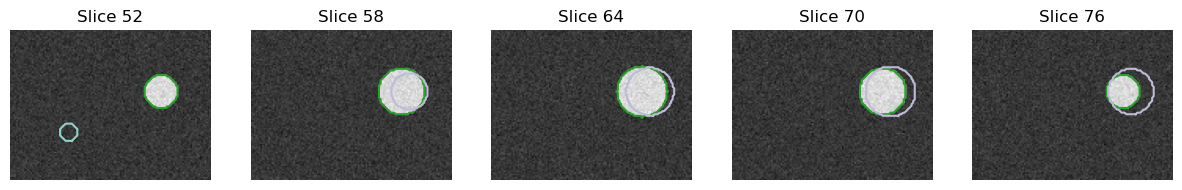

In [11]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=6, 
    slice_axis=3, 
)
plot_sagittal = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=6, 
    slice_axis=2, 
)
plot_coronal = segmplot.PlotSegmentation(
    num_slices=5, 
    slice_spacing=6, 
    slice_axis=1, 
)



B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (15,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

plt.figure('segm', (15,5))
plot_sagittal(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()

plt.figure('segm', (15,5))
plot_coronal(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.show()


## Generate a high-quality PDF figure

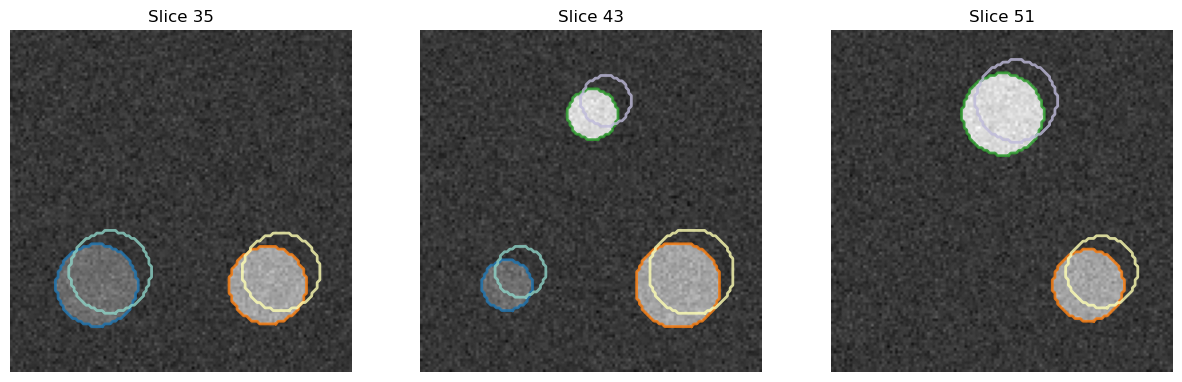

In [12]:
plot_axial = segmplot.PlotSegmentation(
    num_slices=3, 
    slice_spacing=8, 
    slice_axis=3, 
    linewidth=2.0, 
    alpha=0.8,
)

B_fake = np.roll(np.roll(B, 5, axis=1), 5, axis=2)


plt.figure('segm', (15,5))
plot_axial(I, [B, B_fake], cmap_name=['tab10','Set3'], bbox_image=D)
plt.savefig('example.pdf')
plt.show()